# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
#  student details 1: Arkadi D. 8610
#  student details 2: Elia M. 9750
#  student details 3: Ariel L. 7877

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: למקסם את אחוזי ההצלחה
Prompt1: What is the best model for my dataset
    
Prompt2: What is the optimal amount of features for the LightBGM model
    
Prompt3: Get me all the major cities coordinates in California

Prompt4: Give me ideas for new features according to the best parameters table
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

מערך הנתונים של מחירי הדיור בקליפורניה כולל 20,640 דגימות ו-8 מאפיינים שהם בעלי ערך חיזוי, בנוסף למשתנה מטרה המייצג את מחירי הדיור. הנתונים מתארים מאפיינים דמוגרפיים וגאוגרפיים של אזורים שונים בקליפורניה, וכוללים בין היתר את ההכנסה החציונית, גיל הבתים החציוני, ממוצע מספר החדרים וחדרי השינה למשק בית, גודל האוכלוסייה, ממוצע גודל משק הבית וכן את קווי הרוחב והאורך של כל אזור. חשוב לציין כי לא קיימים ערכים חסרים במערך הנתונים.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [9]:
import pandas as pd

# טעינת הנתונים
housing_train = pd.read_csv("housing_train.csv")
housing_test = pd.read_csv("housing_test.csv")

# מציג את חמשת השורות הראשונות מכל קובץ
print("Train set:")
display(housing_train.head())
print("Test set:")
display(housing_test.head())

Train set:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


Test set:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# טעינת ספריות הויזואליזציה

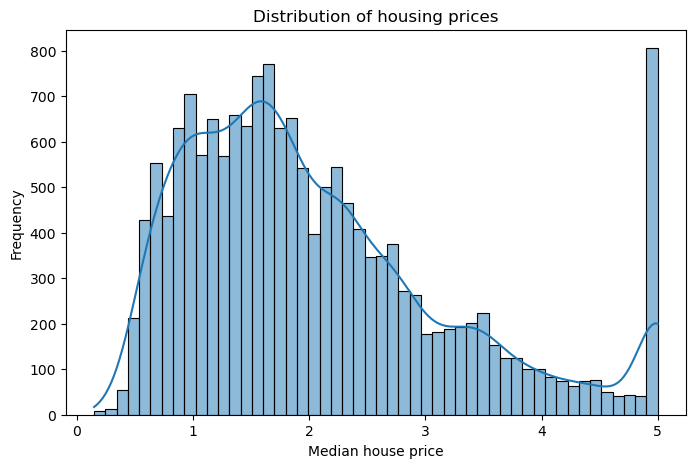

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(housing_train['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of housing prices")
plt.xlabel("Median house price")
plt.ylabel("Number of houses")
plt.show()
# מטרה: להציג את התפלגות מחירי הדיור

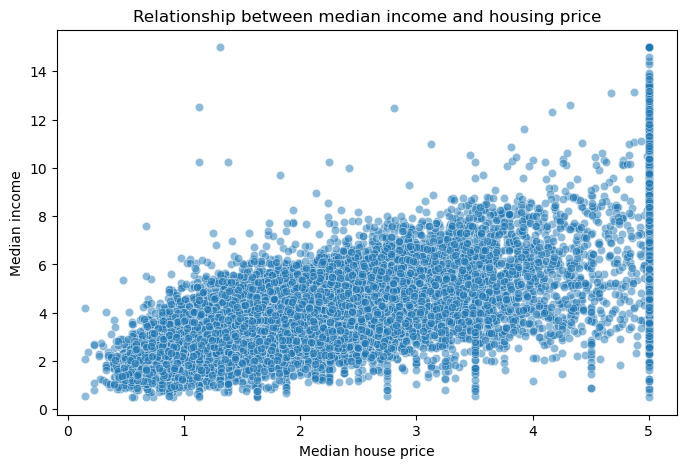

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MedHouseVal', y='MedInc', data=housing_train, alpha=0.5)
plt.title("Relationship between median income and housing price")
plt.xlabel("Median house price")
plt.ylabel("Median income")
plt.show()
# מטרה: לבדוק האם קיים קשר חיובי בין הכנסה לבין מחירי הדיור

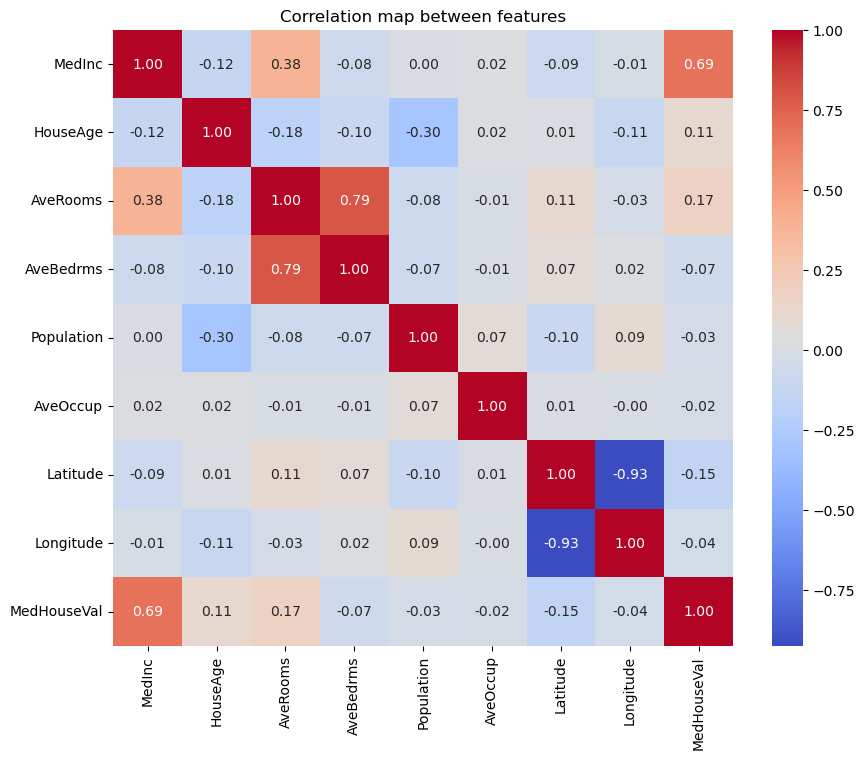

In [13]:
plt.figure(figsize=(10, 8))
corr = housing_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation map between features")
plt.show()
# מטרה: להבין אילו משתנים קשורים זה לזה ובאילו כדאי להתמקד בעת בניית המודל

In [14]:
housing_train.describe()
#  מטרה: הצגת טבלה סטטיסטית המספקת מידע כללי כמו: ממוצע, סטיית תקן, מינימום, מקסימום

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Part 3 - Experiments
You could add as many code cells as needed

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# העתקת הדאטה למניעת שינויים על המקור
train_data = housing_train.copy()

# הוספת פיצ'רים חדשים
train_data['AreaDensity'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['RoomsPerPerson'] = train_data['AveRooms'] / (train_data['Population'] + 0.0001)
train_data['BedRoomsToRoomsRatio'] = train_data['AveBedrms'] / (train_data['AveRooms'] + 0.0001)
train_data['PopulationPerHousehold'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['LocationIndex'] = abs(train_data['Latitude']) + abs(train_data['Longitude'])
train_data['MedIncSquared'] = train_data['MedInc'] ** 2

# מאגר תוצאות
results = []

# סוגי גרסאות התוכנה
feature_eng_versions = {
    'original': housing_train.drop('MedHouseVal', axis=1),
    'scaled': StandardScaler().fit_transform(housing_train.drop('MedHouseVal', axis=1)),
    'with_area_density': train_data.drop('MedHouseVal', axis=1),
    'with_area_density_scaled': StandardScaler().fit_transform(train_data.drop('MedHouseVal', axis=1))
}

# המודלים והפרמטרים
models_and_parameters = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# הרצה על כל סוגי גרסאות התוכנה
for fe_name, X in feature_eng_versions.items():
    y = housing_train['MedHouseVal']

    for model_name, mp in models_and_parameters.items():
        grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X, y)

        results.append({
            'Feature Engineering': fe_name,
            'Model': model_name,
            'Best Params': grid.best_params_,
            'Success Percentage': grid.best_score_
        })

# טבלה מסכמת של תוצאות
results_df = pd.DataFrame(results)

# הצגה לפי סדר יורד של אחוזי ההצלחה
results_df = results_df.sort_values(by='Success Percentage', ascending=False).reset_index(drop=True)

# הצגה
display(results_df)

,Feature Engineering,Model,Best Params,Success Percentage
0,with_area_density,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820476
1,with_area_density_scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.819452
2,scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815204
3,original,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815133
4,with_area_density_scaled,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.799158
5,with_area_density,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.799100
6,scaled,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.797287
7,original,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.797252
8,with_area_density,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.676657
9,with_area_density_scaled,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.676329


In [54]:
# עדכון טווחים של היפר פרמטרים
expanded_models_and_parameters = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5, 7]
        }
    }
}

# הרצה על גרסאות התוכנה 
for fe_name, X in feature_eng_versions.items():
    y = housing_train['MedHouseVal']

    if fe_name not in ['with_area_density_scaled']:  # מתמקדים בגרסה אחת משופרת
        continue

    for model_name, mp in expanded_models_and_parameters.items():
        grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X, y)

    results.append({
            'Feature Engineering': fe_name + " (Extended)",
            'Model': model_name,
            'Best Params': grid.best_params_,
            'Success Percentage': grid.best_score_
        })

# טבלת תוצאות מעודכנת
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Success Percentage', ascending=False).reset_index(drop=True)

# הצגה
display(results_df)

,Feature Engineering,Model,Best Params,Success Percentage
0,Advanced + RFE + log_target,LightGBM (RFE),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871269
1,with_area_density_scaled + log_target,LightGBM (Tuned + log target),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871060
2,with_area_density_scaled (Advanced),LightGBM,"{'learning_rate': 0.1, 'n_estimators': 200, 'n...",0.843584
3,with_area_density_scaled (Advanced),XGBoost,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.838478
4,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
5,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
6,with_area_density,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820476
7,with_area_density_scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.819452
8,scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815204
9,original,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815133


In [18]:
!pip install lightgbm xgboost # הורדת מודל אם לא קיים כבר

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# יצירת המודלים
advanced_models = {
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'num_leaves': [31, 50],
            'learning_rate': [0.05, 0.1]
        }
    }
}

# feature engineering ו-scaling
X = feature_eng_versions['with_area_density_scaled']
y = housing_train['MedHouseVal']

# הרצה על המודלים
for model_name, mp in advanced_models.items():
    print(f"Running GridSearch for {model_name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X, y)

    results.append({
        'Feature Engineering': 'with_area_density_scaled (Advanced)',
        'Model': model_name,
        'Best Params': grid.best_params_,
        'Success Percentage': grid.best_score_
    })
# טבלת תוצאות מעודכנת
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Success Percentage', ascending=False).reset_index(drop=True)
# הצגה 
display(results_df)

Running GridSearch for XGBoost...
Running GridSearch for LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 14
[LightGBM] [Info] Start training from score 2.065267


,Feature Engineering,Model,Best Params,Success Percentage
0,with_area_density_scaled (Advanced),LightGBM,"{'learning_rate': 0.1, 'n_estimators': 200, 'n...",0.843584
1,with_area_density_scaled (Advanced),XGBoost,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.838478
2,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
3,with_area_density,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820476
4,with_area_density_scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.819452
5,scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815204
6,original,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815133
7,with_area_density_scaled (Extended),Random Forest,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.800949
8,with_area_density_scaled,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.799158
9,with_area_density,Random Forest,"{'max_depth': None, 'n_estimators': 100}",0.799100


In [60]:
from sklearn.cluster import KMeans

# העתקת הדאטה והוספת פיצ'רים
train_data = housing_train.copy()
train_data['AreaDensity'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['RoomsPerPerson'] = train_data['AveRooms'] / (train_data['Population'] + 0.0001)
train_data['BedRoomsToRoomsRatio'] = train_data['AveBedrms'] / (train_data['AveRooms'] + 0.0001)
train_data['LocationIndex'] = abs(train_data['Latitude']) + abs(train_data['Longitude'])
train_data['MedIncSquared'] = train_data['MedInc'] ** 2
train_data['LogMedInc'] = np.log1p(train_data['MedInc'])
train_data['MedIncCubed'] = train_data['MedInc'] ** 3
train_data['MedInc_AveOccup'] = train_data['MedInc'] * train_data['AveOccup']
train_data['Lat_Long_Interaction'] = train_data['Latitude'] * train_data['Longitude']

# קואורדינטות של הערים במילון
city_coords = {
    'SF': (37.7749, -122.4194),
    'LA': (34.0522, -118.2437),
    'SD': (32.7157, -117.1611),
    'SAC': (38.5816, -121.4944),
    'SJ': (37.3387, -121.8853),
    'OAK': (37.8044, -122.2711),
    'FRES': (36.7378, -119.7871),
    'BAK': (35.3733, -119.0187),
    'SB': (34.4208, -119.6982),
    'RIV': (33.9806, -117.3755),
    'STOCK': (37.9577, -121.2908),
    'LB': (33.7701, -118.1937),
    'ANA': (33.8366, -117.9143),
    'SA': (33.7456, -117.8678),
    'IRV': (33.6846, -117.8265),
    'MOD': (37.6391, -120.9969),
    'OXN': (34.1975, -119.1771),
    'CHICO': (39.7285, -121.8375),
    'REDD': (40.5865, -122.3917),
    'EUREKA': (40.8021, -124.1637),
    'LV': (36.1699, -115.1398),
    'PHX': (33.4484, -112.0740),
}

# הוספת הפיצ'רים באמצעות לולאה
for city, (lat, lon) in city_coords.items():
    train_data[f'DistanceTo{city}'] = np.sqrt((train_data['Latitude'] - lat)**2 + (train_data['Longitude'] - lon)**2)

# Use KMeans to cluster based on Latitude and Longitude
coords = train_data[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)  # הגדרת כמות האשכולות
train_data['GeoCluster'] = kmeans.fit_predict(coords)


# לוג לטארגט לשיפור המודל
y_log = np.log1p(train_data['MedHouseVal'])
X = train_data.drop('MedHouseVal', axis=1)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LightGBM עם y_log
param_grid_lgbm = {
    'n_estimators': [900, 1000, 1100],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.05, 0.1],
    'min_child_samples': [7, 8]
}
# Grid Search
lgbm_model = LGBMRegressor(random_state=42)
grid_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_scaled, y_log)

# חשיבות פיצ'רים
importances = grid_lgbm.best_estimator_.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# תוצאה
print("Best parameters:", grid_lgbm.best_params_)
print("Best R2 score (log target):", grid_lgbm.best_score_)
# הצגת טבלת המאייפנים הכי טובים
display(feat_imp_df)

# הגדרת התוצאה החדשה
new_result = {
    'Feature Engineering': 'with_area_density_scaled + log_target',
    'Model': 'LightGBM (Tuned + log target)',
    'Best Params': grid_lgbm.best_params_,
    'Success Percentage': grid_lgbm.best_score_
}

# לולאה שבודקת איזה גרסאת מודל שאני עובד עליו כרגע הוא עם האחוז ההצלחה הכי גבוהה
results = [result for result in results 
           if not (result['Feature Engineering'] == new_result['Feature Engineering'] 
                   and result['Model'] == new_result['Model'])]

# הוספת התוצאה החדשה
results.append(new_result)

# טבלת תוצאות מעודכנת
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Success Percentage', ascending=False).reset_index(drop=True)
# הצגה
display(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9749
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 40
[LightGBM] [Info] Start training from score 1.055146
Best parameters: {'learning_rate': 0.05, 'min_child_samples': 7, 'n_estimators': 1100, 'num_leaves': 50}
Best R2 score (log target): 0.871060473493183


,Feature,Importance
0,AveOccup,4458
1,AveBedrms,3426
2,HouseAge,3226
3,MedInc,3031
4,BedRoomsToRoomsRatio,3015
5,MedInc_AveOccup,2966
6,AveRooms,2741
7,AreaDensity,2628
8,RoomsPerPerson,2470
9,Population,2347


,Feature Engineering,Model,Best Params,Success Percentage
0,Advanced + RFE + log_target,LightGBM (RFE),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871269
1,with_area_density_scaled + log_target,LightGBM (Tuned + log target),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871060
2,with_area_density_scaled (Advanced),LightGBM,"{'learning_rate': 0.1, 'n_estimators': 200, 'n...",0.843584
3,with_area_density_scaled (Advanced),XGBoost,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.838478
4,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
5,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
6,with_area_density,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820476
7,with_area_density_scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.819452
8,scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815204
9,original,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815133


In [20]:
from sklearn.feature_selection import RFE

# בחירת המודל
base_lgbm = LGBMRegressor(random_state=42)

# נבחר כמות פיצ'רים רצויה מתוך כל הפיצ'רים שיצרנו
rfe_selector = RFE(base_lgbm, n_features_to_select=30, step=1)
rfe_selector.fit(X_scaled, y_log)

# ניצור מערך נתונים עם הפיצ'רים שנבחרו
selected_features_mask = rfe_selector.support_
selected_feature_names = X.columns[selected_features_mask]
print(f"Selected {len(selected_feature_names)} features:\n")
print(selected_feature_names)

# נבצע עדכון כדי שהשינויים יוכלו להישמר
X_selected = X[selected_feature_names]
X_selected_scaled = scaler.fit_transform(X_selected)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9749
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 40
[LightGBM] [Info] Start training from score 1.055146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9743
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 39
[LightGBM] [Info] Start training from score 1.055146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9488
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 38
[LightGBM] [Info] Start tra

In [21]:
# Grid Search מחדש על הפיצ'רים שנבחרו
lgbm_model_rfe = LGBMRegressor(random_state=42)
grid_lgbm_rfe = GridSearchCV(lgbm_model_rfe, param_grid_lgbm, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm_rfe.fit(X_selected_scaled, y_log)

print("Best parameters (RFE):", grid_lgbm_rfe.best_params_)
print("Best R2 score (RFE):", grid_lgbm_rfe.best_score_)

# נעדכן את הטבלה עם התוצאות
new_result_rfe = {
    'Feature Engineering': 'Advanced + RFE + log_target',
    'Model': 'LightGBM (RFE)',
    'Best Params': grid_lgbm_rfe.best_params_,
    'Success Percentage': grid_lgbm_rfe.best_score_
}

# הסרה אם כבר יש
results = [r for r in results 
           if not (r['Feature Engineering'] == new_result_rfe['Feature Engineering'] 
                   and r['Model'] == new_result_rfe['Model'])]

results.append(new_result_rfe)

# הצגה מחודשת
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Success Percentage', ascending=False).reset_index(drop=True)
display(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7448
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 30
[LightGBM] [Info] Start training from score 1.055146
Best parameters (RFE): {'learning_rate': 0.05, 'min_child_samples': 7, 'n_estimators': 1100, 'num_leaves': 50}
Best R2 score (RFE): 0.8712690768351423


,Feature Engineering,Model,Best Params,Success Percentage
0,Advanced + RFE + log_target,LightGBM (RFE),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871269
1,with_area_density_scaled + log_target,LightGBM (Tuned + log target),"{'learning_rate': 0.05, 'min_child_samples': 7...",0.871060
2,with_area_density_scaled (Advanced),LightGBM,"{'learning_rate': 0.1, 'n_estimators': 200, 'n...",0.843584
3,with_area_density_scaled (Advanced),XGBoost,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.838478
4,with_area_density_scaled (Extended),Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.835381
5,with_area_density,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.820476
6,with_area_density_scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.819452
7,scaled,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815204
8,original,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.815133
9,with_area_density_scaled (Extended),Random Forest,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.800949


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [45]:
# העתקת הדאטה והוספת פיצ'רים נבחרים
train_data = housing_train.copy()
train_data['AreaDensity'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['RoomsPerPerson'] = train_data['AveRooms'] / (train_data['Population'] + 0.0001)
train_data['BedRoomsToRoomsRatio'] = train_data['AveBedrms'] / (train_data['AveRooms'] + 0.0001)
train_data['LocationIndex'] = abs(train_data['Latitude']) + abs(train_data['Longitude'])
train_data['MedIncSquared'] = train_data['MedInc'] ** 2
train_data['LogMedInc'] = np.log1p(train_data['MedInc'])
train_data['MedIncCubed'] = train_data['MedInc'] ** 3
train_data['MedInc_AveOccup'] = train_data['MedInc'] * train_data['AveOccup']
train_data['Lat_Long_Interaction'] = train_data['Latitude'] * train_data['Longitude']

# חישוב מרחקים מערים מרכזיות
cities_coords = {
    'SF': (37.7749, -122.4194),
    'LA': (34.0522, -118.2437),
    'SD': (32.7157, -117.1611),
    'SAC': (38.5816, -121.4944),
    'SJ': (37.3387, -121.8853),
    'OAK': (37.8044, -122.2711),
    'FRES': (36.7378, -119.7871),
    'BAK': (35.3733, -119.0187),
    'SB': (34.4208, -119.6982),
    'RIV': (33.9806, -117.3755),
    'STOCK': (37.9577, -121.2908),
    'LB': (33.7701, -118.1937),
    'ANA': (33.8366, -117.9143),
    'SA': (33.7456, -117.8678),
    'IRV': (33.6846, -117.8265),
    'MOD': (37.6391, -120.9969),
    'OXN': (34.1975, -119.1771),
    'CHICO': (39.7285, -121.8375),
    'REDD': (40.5865, -122.3917),
    'EUREKA': (40.8021, -124.1637),
    'LV': (36.1699, -115.1398),
    'PHX': (33.4484, -112.0740)
}
# הוספת הפיצ'רים באמצעות לולאה
for city, (lat, lon) in cities_coords.items():
    train_data[f'DistanceTo{city}'] = np.sqrt((train_data['Latitude'] - lat)**2 + (train_data['Longitude'] - lon)**2)

# הוספת אשכולות גיאוגרפיים
coords = train_data[['Latitude', 'Longitude']]
train_data['GeoCluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(coords)

# לוג לטארגט לשיפור המודל
y = np.log1p(train_data['MedHouseVal'])
X = train_data.drop('MedHouseVal', axis=1)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# אימון מחדש של המודל עם הפרמטרים שנמצאו הכי טובים
best_params = {
    'n_estimators': 1100,
    'num_leaves': 70,
    'learning_rate': 0.05,
    'min_child_samples': 7
}
final_model = LGBMRegressor(**best_params, random_state=42)
final_model.fit(X_scaled, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9749
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 40
[LightGBM] [Info] Start training from score 1.055146


LGBMRegressor(learning_rate=0.05, min_child_samples=7, n_estimators=1100,
              num_leaves=70, random_state=42)

In [46]:
from sklearn.metrics import r2_score

# חיזוי האימון
y_pred_log = final_model.predict(X_scaled)

# R² ללוג הטארגט
r2_log = r2_score(y, y_pred_log)
print(f"R² score (log target, train set): {r2_log:.5f}")

# R² לטארגט המקורי
y_true = np.expm1(y)
y_pred = np.expm1(y_pred_log)
r2_normal = r2_score(y_true, y_pred)
print(f"R² score (real target, train set): {r2_normal:.5f}")

R² score (log target, train set): 0.99233
R² score (real target, train set): 0.99140


## Part 5 - Apply on test and show model performance estimation

In [49]:
# טעינת קובץ טסט ועבודה על העותק
test_data = housing_test.copy()

# הוספת הפיצ'רים בדיוק כמו באימון
test_data['AreaDensity'] = test_data['Population'] / (test_data['AveOccup'] + 0.0001)
test_data['RoomsPerPerson'] = test_data['AveRooms'] / (test_data['Population'] + 0.0001)
test_data['BedRoomsToRoomsRatio'] = test_data['AveBedrms'] / (test_data['AveRooms'] + 0.0001)
test_data['LocationIndex'] = abs(test_data['Latitude']) + abs(test_data['Longitude'])
test_data['MedIncSquared'] = test_data['MedInc'] ** 2
test_data['LogMedInc'] = np.log1p(test_data['MedInc'])
test_data['MedIncCubed'] = test_data['MedInc'] ** 3
test_data['MedInc_AveOccup'] = test_data['MedInc'] * test_data['AveOccup']
test_data['Lat_Long_Interaction'] = test_data['Latitude'] * test_data['Longitude']

# קורדינטות הערים
city_coords = {
    'DistanceToSF': (37.7749, -122.4194), 'DistanceToLA': (34.0522, -118.2437),
    'DistanceToSD': (32.7157, -117.1611), 'DistanceToSAC': (38.5816, -121.4944),
    'DistanceToSJ': (37.3387, -121.8853), 'DistanceToOAK': (37.8044, -122.2711),
    'DistanceToFRES': (36.7378, -119.7871), 'DistanceToBAK': (35.3733, -119.0187),
    'DistanceToSB': (34.4208, -119.6982), 'DistanceToRIV': (33.9806, -117.3755),
    'DistanceToSTOCK': (37.9577, -121.2908), 'DistanceToLB': (33.7701, -118.1937),
    'DistanceToANA': (33.8366, -117.9143), 'DistanceToSA': (33.7456, -117.8678),
    'DistanceToIRV': (33.6846, -117.8265), 'DistanceToMOD': (37.6391, -120.9969),
    'DistanceToOXN': (34.1975, -119.1771), 'DistanceToCHICO': (39.7285, -121.8375),
    'DistanceToREDD': (40.5865, -122.3917), 'DistanceToEUREKA': (40.8021, -124.1637),
    'DistanceToLV': (36.1699, -115.1398), 'DistanceToPHX': (33.4484, -112.0740)
}
# הוספת הפיצ'רים באמצעות לולאה
for name, (lat, lon) in city_coords.items():
    test_data[name] = np.sqrt((test_data['Latitude'] - lat)**2 + (test_data['Longitude'] - lon)**2)

# יצירת אשכולות מרחביים שהותאמו לאימון
test_data['GeoCluster'] = kmeans.predict(test_data[['Latitude', 'Longitude']])

# המרת ערכי המטרה האמיתיים כדי להתאים לפורמט התחזיות של המודל
y_test_real = test_data['MedHouseVal']
y_test_log = np.log1p(y_test_real)

# מחיקת עמודת המטרה מסט הבדיקה לפני חיזוי
X_test = test_data.drop('MedHouseVal', axis=1)

# Scaling
X_test_scaled = scaler.transform(X_test)

# חיזוי
best_lgbm_model = grid_lgbm.best_estimator_
y_pred_log = best_lgbm_model.predict(X_test_scaled)
y_pred_real = np.expm1(y_pred_log)

# הצגה של חמשת החיזויים ראשונים
print("First 5 predicted values (real scale):")
print(y_pred_real[:5])

# הערכת איכות המודל
r2_log = r2_score(y_test_log, y_pred_log)
r2_real = r2_score(y_test_real, y_pred_real)

print(f"\nR² score (log target, test set): {r2_log:.5f}")
print(f"R² score (real target, test set): {r2_real:.5f}")

First 5 predicted values (real scale):
[3.26219099 2.65687896 2.55409362 1.02455225 1.12607158]

R² score (log target, test set): 0.88783
R² score (real target, test set): 0.87432
